# Project: TMDB MOVIE DATA ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **About The Dataset**: 
> This Dataset contains arround 10,000 movies. The goal of this analysis is to get insights into some questions that follow suit.
>> 1. How does the vote ratings(vote_average) affect the revenue, budget, profit and runtime a movie?
>>
>>
>> 2. How does the popularity affect the revenue, budget, profit and runtime a movie?
>>
>>
>> 3. How does the popularity and vote_average affect the revenue, budget, profit and runtime a movie?
>>
>>
>> 4. Which Genre is the most produced movie?
>
>
> In this analysis we will employ numpy, pandas, matplotlib and seaborn.

### Details on the columns of the dataset.

 >Here is a General description of the columns in the dataset.
 The dataset comes with 21 columns ranging from id, revenue, genres among others.

|  | Column | Description |
|--| --- | --- |
| 1 | id | ID for each movie |
| 2 | imdb_id | Unique ID for IMDB database system |
| 3 | popularity | How popular the movie is |
| 4 | budget | Money spent on producing the movie |
| 5 | revenue | Money generated from producing movie |
| 6 | original_title | Title of the Movie |
| 7 | cast | Actors and/or Actress in Movie|
| 8 | homepage | Website for Movie |
| 9 | director | Director of the Movie |
| 10 | tagline | Tag for the Movie |
| 11 | keywords | Words that describe the movie content |
| 12 | overview | General Movie Information |
| 13 | runtime | Length of the movie in mintues |
| 14 | genres | Class or genre of the movie |
| 15 | production_companies | Companies involved in movie production |
| 16 | release_date | Date the movie was released|
| 17 | vote_count | Number of people who reviewed the movie |
| 18 | vote_average | Average score movie review score |
| 19 | release_year | Year that the movie was released |
| 20 | budget_adj | budget adjusted for inflation in 2010  |
| 21 | revenue_adj | revenue adjusted for inflation in 2010 |


In [1]:
# Here I import packages that I plan to use in this data analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Here we will wrangle and explore data using numpy and pandas to gather insight about the features of the dataset and prepare our dataset for EDA

### General Properties

In [2]:
#loading dataset and printing few rows
df = pd.read_csv("tmdb-movies.csv")

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#shape of the dataset: number of rows and columns
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Decisions on _Columns_ and _rows_ to drop from the dataset info.

> 1. **homepage.** This is because homepage has only 2936 non null values out of the possible 10866 rows of data. Dropping all the other row values would reduce the sample data availiable and possibly loose certain feature description. Hence the decision to drop the entire column from the dataset.
>
>
> 2. **director.** The director column has 10822 non null values. This means that 44 data values are missing from the data set. Hence we will drop all the rows that are empthy (Nan values or isnull()) in the director coulmn
>
>
> 3. **cast.** The cast column has 10790 non null values. This means there aree only 76 miss data values. Hence we will drop all the rows with empthy (Nan values) in the Cast column.
>
>
> 4. **tagline** This column does in no way help us to answer our analysis question. Hence we will drop the entire column from the data set.
>
>
> 5. **overview** This column does in no way help us to answer our analysis question. Hence we will drop the entire column from the data set.
>
>
> 6. **imdb_id** This column does in no way help us to answer our analysis question. Hence we will drop the entire column from the data set.
>
>
> 7. **keywords** This column does in no way help us to answer our analysis question. Hence we will drop the entire column from the data set.
>
>
> 8. **genres** The Genres column has 10843 non null values. This means that 23 data values are missing from the column dataset. Hence we will drop all rows that are empthy(Nan values or isnull()) in the Genres column
>
>
> 9. **production_companies** This column has 9836 non null values. This means that there are 1030 data vlaues missing from the column dataset. Moreover this column does in now way help us to answer our analysis questions. Hence we will drop the entire column from the data set.

### Data Cleaning of the TMDB MOVIE Datset

In [5]:
#Droping the columns homepage, tagline, keywords, overview, production_companies  

df.drop(['homepage', 'tagline', 'keywords', 'overview', 'imdb_id', 'production_companies'], axis=1, inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.shape

(10866, 15)

**Update on dataset**
> Our dataframe now has 15 columns and 10866 rows.

In [7]:
# droping rows with Nan values in the cast, director, genres
df.dropna(subset = ['director', 'cast', 'genres'], axis=0, inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
sum(df.duplicated())

1

>**Dataframe has 1(one) duplicate row and must be removed**

In [9]:
#dropping duplicate columns
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   release_date    10731 non-null  object 
 10  vote_count      10731 non-null  int64  
 11  vote_average    10731 non-null  float64
 12  release_year    10731 non-null  int64  
 13  budget_adj      10731 non-null  float64
 14  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


### Data Cleaning Update.
> The dataset now has 10731 non-null values for each of the 15 columns present.
>
>
>Now we can verify if all the datasets are of the type we need for our analysis
>
>
> Then we look at the early statistical information about our dataset to make prepare it for analysis.

In [11]:
#checking the datatypes of the columns
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [12]:
# Checking early desciption of our dataset and some pre-stats information
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,65201.741869,0.652615,1.480365e+07,4.031989e+07,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,91470.508056,1.004804,3.106456e+07,1.176524e+08,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10547.500000,0.210765,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20323.000000,0.387081,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73948.500000,0.720889,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Decisions on _Columns_ and _rows_ to drop from the dataset  desciption.

> 1. The budget, revenue, budget_adj and revenue_adj columns have minimmium values of 0(zero). This is not preferred data value for our analysis. We seek to find insight of other variables(features) in relation to these target variables. 
>
>> Hence we would clean up rows with data values of 0 in the budget, revenue, budget_adj, revenue_adj columns.
>
>
> 2. **Also the Runtime of a movie can't be zero.** The run time of a movie is the duration of a motion picture, a theatrical performance, or a recording. Hence logically no movie can have a runtime of zero. We would furthur investigate this 0 values with a target variables and take decisions.

In [13]:
# dataframe where the revenue value is zero and where the budget value is zero respectively
zero_revenue = df.query('revenue in [0]')
zero_budget =df.query('budget in [0]')

In [14]:
# checking the shape of dataset with zero values for revenue and budget respectively
zero_revenue.shape , zero_budget.shape

((5888, 15), (5578, 15))

In [15]:
# desciption on budget column in dataframe for values where revenue is zero
zero_revenue['budget'].describe()

count    5.888000e+03
mean     2.630276e+06
std      8.905355e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.500000e+08
Name: budget, dtype: float64

In [16]:
# desciption on revenue column in dataframe for values where budget is zero

zero_budget['revenue'].describe()

count    5.578000e+03
mean     3.172016e+06
std      1.429964e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.536254e+08
Name: revenue, dtype: float64

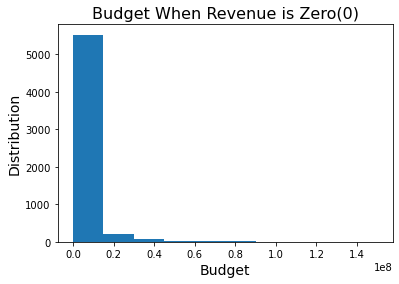

In [17]:
#histogram for budget where revenue is zero
plt.hist(zero_revenue['budget']);
plt.xlabel('Budget', fontsize=14);
plt.ylabel('Distribution', fontsize=14);
plt.rcParams['figure.figsize'] = [8.5, 6]
plt.title('Budget When Revenue is Zero(0)', fontsize=16);

>From the Diagram above we can see that when the value of revenue is zero(0) the coresponding budget value is also zero(0).
>
>
>> The value count of rows with 0 value as revenue is 5888. Hence if we fill with mean values of revenue about half of the dataset will be mean values of revenue and affect the analysis if this target variable.
>>
>>
>> Hence we will drop all rows with a value of zero(0) for the revenue column.

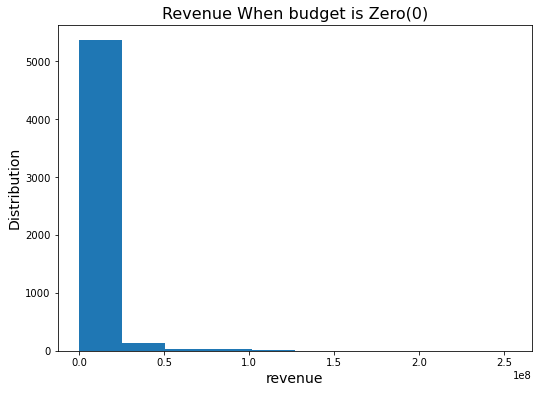

In [18]:
#histogram for revenue where budget is zero
plt.hist(zero_budget['revenue']);
plt.xlabel('revenue', fontsize=14);
plt.ylabel('Distribution', fontsize=14);
plt.rcParams['figure.figsize'] = [8.5, 6]
plt.title('Revenue When budget is Zero(0)', fontsize=16);

>From the Diagram above we can see that when the value of budget is zero(0) the coresponding revenue value is also zero(0).
>
>
>> The value count of rows with 0 value as budget is 5578. Hence if we fill with mean values of budget about half of the dataset will be mean values of budget and affect the analysis if this target variable.
>>
>>
>> Hence we will drop all rows with a value of zero(0) for the budget column.

In [19]:
#droping the rows where revenue and budget values are zero
df=df[(df.revenue != 0) & (df.budget !=0)]
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [20]:
df.shape

(3849, 15)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3849 non-null   int64  
 1   popularity      3849 non-null   float64
 2   budget          3849 non-null   int64  
 3   revenue         3849 non-null   int64  
 4   original_title  3849 non-null   object 
 5   cast            3849 non-null   object 
 6   director        3849 non-null   object 
 7   runtime         3849 non-null   int64  
 8   genres          3849 non-null   object 
 9   release_date    3849 non-null   object 
 10  vote_count      3849 non-null   int64  
 11  vote_average    3849 non-null   float64
 12  release_year    3849 non-null   int64  
 13  budget_adj      3849 non-null   float64
 14  revenue_adj     3849 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 481.1+ KB


**Runtime column already corrected!**
> Removing the rows with zero values for budget and revenue auto-removed the rows with zero runtime values, hence there is ni minimmium value of zero anymore. 
>
>
> This shows that all the rows with zero runtime values had either zero as budget value or zero as revenue value

**Cleaned Data Details**

> 1. Shape : 3849 rows and 15 columns
>
>
> 2. Datatypes : All columns have the correct data types needed for the EDA upcoming.


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : How does the vote ratings(vote_average) affect the revenue, budget, profit and runtime a movie?

In [22]:
# Viewing the basic statistical parameters of the vote_average of the movies
df['vote_average'].describe()

count    3849.000000
mean        6.168693
std         0.794697
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [23]:
# Creating categories for Vote_average ratings.
# Categories are Lowest, Average, Fairly High and Highest
bin_edges1=[2.100000, 5.700000, 6.200000, 6.700000, 8.500000]
bin_names1=['Lowest','Average','Fairly High','Highest']
df['vote']=pd.cut(df['vote_average'], bin_edges1, labels=bin_names1)

#Creating 'profit' column as profit is revenue - budget
df['profit']=df['revenue']-df['budget']
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Fairly High,1363528810


In [25]:
#Grouping the datasets vote (categories from vote_average) and viewing the target variables budget, revenue, runtime and profit
vote_table=df.groupby("vote")['budget', 'revenue', 'runtime','profit'].mean()
vote_table

C:\Users\Anointed\Anaconda3\envs\Trial\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,budget,revenue,runtime,profit
vote,,,,
Lowest,3.580855e+07,6.444357e+07,101.324864,2.863501e+07
Average,3.934508e+07,9.886905e+07,106.940299,5.952397e+07
Fairly High,3.717550e+07,1.128056e+08,111.536935,7.563010e+07
Highest,3.690241e+07,1.650871e+08,118.895787,1.281847e+08


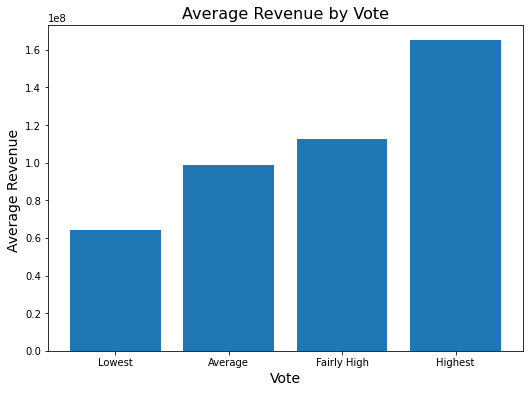

In [58]:
#plotting the average Revenue by vote to gain insight
locations_vote=[1,2,3,4];
revenue_vote=vote_table['revenue'];
labels_vote = vote_table.index.str.title();
plt.bar(locations_vote, revenue_vote, tick_label=labels_vote);
plt.title('Average Revenue by Vote', fontsize=16);
plt.xlabel('Vote', fontsize=14);
plt.ylabel('Average Revenue ', fontsize=14);

### Findings
> The movies with better ratings generated more average Revenue

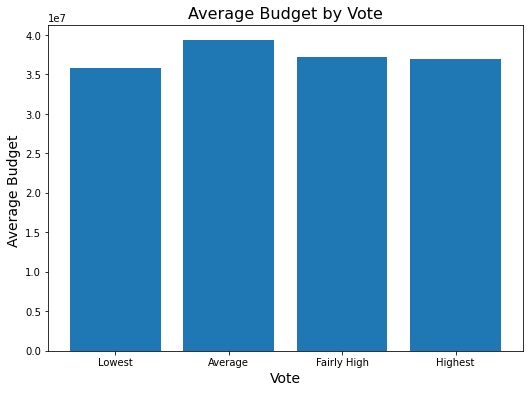

In [29]:
#plotting the average budget by vote to gain insight
budget_vote=vote_table['budget'];
plt.bar(locations_vote, budget_vote, tick_label=labels_vote);
plt.title('Average Budget by Vote', fontsize=16);
plt.xlabel('Vote', fontsize=14);
plt.ylabel('Average Budget ', fontsize=14);

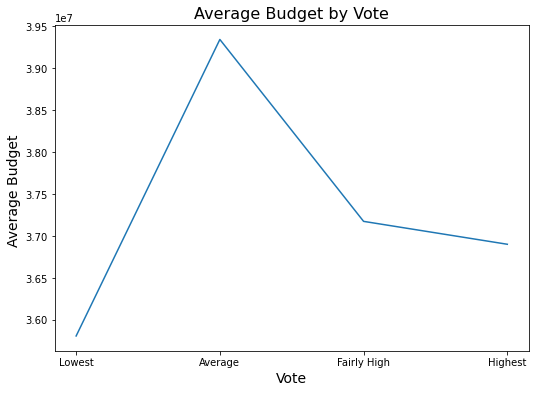

In [30]:
#plotting the average Revenue by vote to gain clear insight
plt.plot(vote_table.index.tolist(), budget_vote.values.tolist());
plt.title('Average Budget by Vote', fontsize=16);
plt.xlabel('Vote', fontsize=14);
plt.ylabel('Average Budget ', fontsize=14);

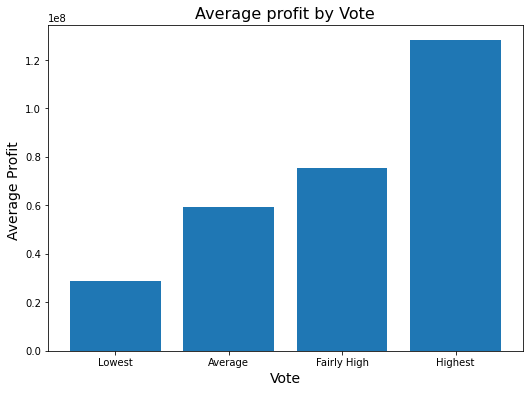

In [32]:
#plotting the average Profit by vote to gain insight
profit_vote=vote_table['profit'];
plt.bar(locations_vote, profit_vote, tick_label=labels_vote);
plt.title('Average profit by Vote', fontsize=16);
plt.xlabel('Vote', fontsize=14);
plt.ylabel('Average Profit ', fontsize=14);

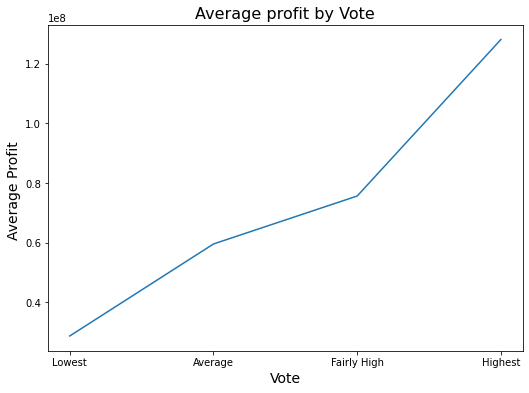

In [33]:
#plotting the average profit by vote to gain clear insight
plt.plot(vote_table.index.tolist(), profit_vote.values.tolist());
plt.title('Average profit by Vote', fontsize=16);
plt.xlabel('Vote', fontsize=14);
plt.ylabel('Average Profit ', fontsize=14);

### Findings
> The best rated movies averagely generated more profit.

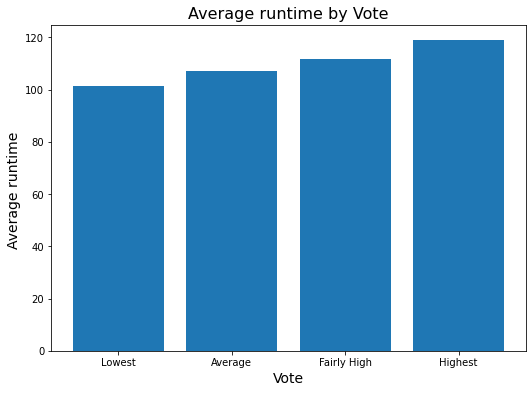

In [34]:
#plotting the average Runtime by vote to gain insight
runtime_vote=vote_table['runtime'];
plt.bar(locations_vote, runtime_vote, tick_label=labels_vote);
plt.title('Average runtime by Vote', fontsize=16);
plt.xlabel('Vote', fontsize=14);
plt.ylabel('Average runtime ', fontsize=14);

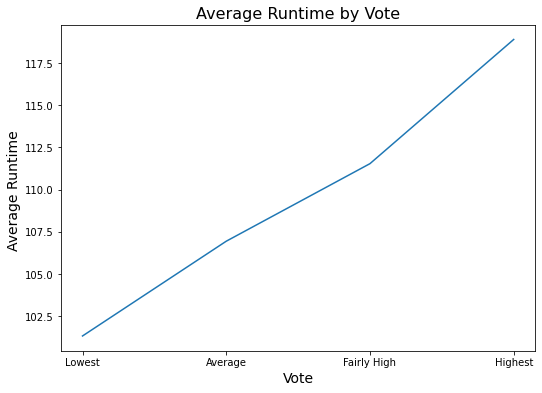

In [35]:
#plotting the average runtime by vote to gain clear insight
plt.plot(vote_table.index.tolist(), runtime_vote.values.tolist());
plt.title('Average Runtime by Vote', fontsize=16);
plt.xlabel('Vote', fontsize=14);
plt.ylabel('Average Runtime ', fontsize=14);

### Findings
> The best rated movies where averagely longer movies(meaning had averagely high runtime)

### Research Question 2 : How does the popularity affect the revenue, budget, profit and runtime a movie?

In [36]:
#general statistic information on popularity column of dataset
df['popularity'].describe()

count    3849.000000
mean        1.192933
std         1.475622
min         0.001117
25%         0.463337
50%         0.798582
75%         1.374300
max        32.985763
Name: popularity, dtype: float64

In [37]:
# creating a categorical data out of the popularity of movie
bin_edges=[0.001117, 0.463337, 0.798582, 1.374300, 32.985763]
bin_names=['Poor','Average','Good','Best']
df['pop']=pd.cut(df['popularity'], bin_edges, labels=bin_names)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote,profit,pop
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Fairly High,1363528810,Best
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Highest,228436354,Best
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Fairly High,185238201,Best
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Highest,1868178225,Best
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Highest,1316249360,Best


In [38]:
popularity_table=df.groupby('pop')['budget', 'revenue', 'runtime', 'profit'].mean()
popularity_table

C:\Users\Anointed\Anaconda3\envs\Trial\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,budget,revenue,runtime,profit
pop,,,,
Poor,1.720997e+07,2.503968e+07,105.162162,7.829714e+06
Average,2.660410e+07,5.024751e+07,108.231809,2.364341e+07
Good,3.764354e+07,9.286848e+07,108.353430,5.522494e+07
Best,6.757619e+07,2.632120e+08,115.147609,1.956358e+08


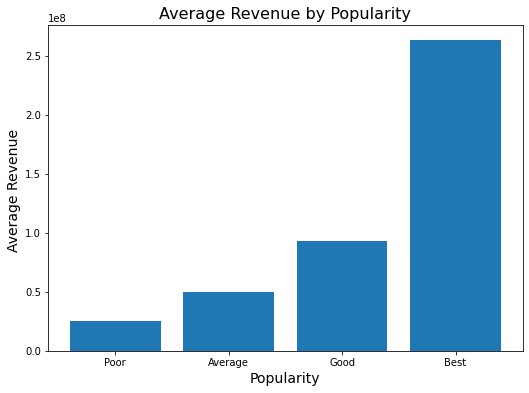

In [39]:
#plotting the average Revenue by pop(popularity categories) to gain insight
locations_pop=[1,2,3,4];
revenue_pop=popularity_table['revenue'];
labels_pop = popularity_table.index.str.title();
plt.bar(locations_pop, revenue_pop, tick_label=labels_pop);
plt.title('Average Revenue by Popularity', fontsize=16);
plt.xlabel('Popularity', fontsize=14);
plt.ylabel('Average Revenue ', fontsize=14);

### Findings
> The more popular the movie the more the average revenues generated. 

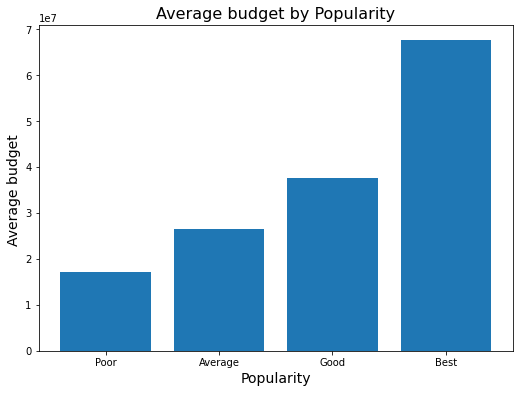

In [41]:
#plotting the average budget by pop(popularity categories) to gain insight
budget_pop=popularity_table['budget'];
plt.bar(locations_pop, budget_pop, tick_label=labels_pop);
plt.title('Average budget by Popularity', fontsize=16);
plt.xlabel('Popularity', fontsize=14);
plt.ylabel('Average budget ', fontsize=14);

### Findings
> As the average budget invested increases the popularity of the movie also increased.

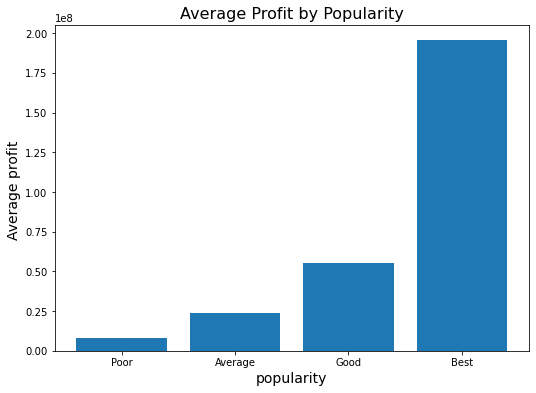

In [43]:
#plotting the average profit by pop(popularity categories) to gain insight
profit_pop=popularity_table['profit'];
plt.bar(locations_pop, profit_pop, tick_label=labels_pop);
plt.title('Average Profit by Popularity', fontsize=16);
plt.xlabel('popularity', fontsize=14);
plt.ylabel('Average profit ', fontsize=14);

### Findings
> The more popular a movie is the more average profit is earned.

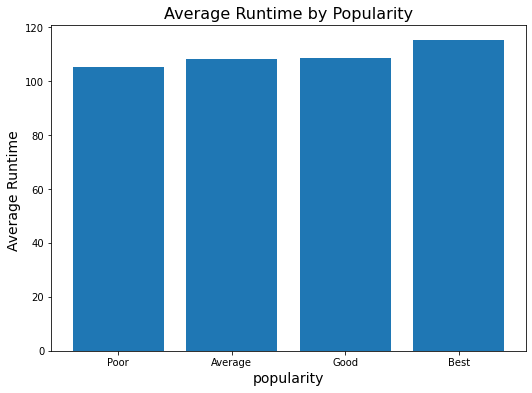

In [44]:
#plotting the average runtime by pop(popularity categories) to gain insight
runtime_pop=popularity_table['runtime'];
plt.bar(locations_pop, runtime_pop, tick_label=labels_pop);
plt.title('Average Runtime by Popularity', fontsize=16);
plt.xlabel('popularity', fontsize=14);
plt.ylabel('Average Runtime ', fontsize=14);

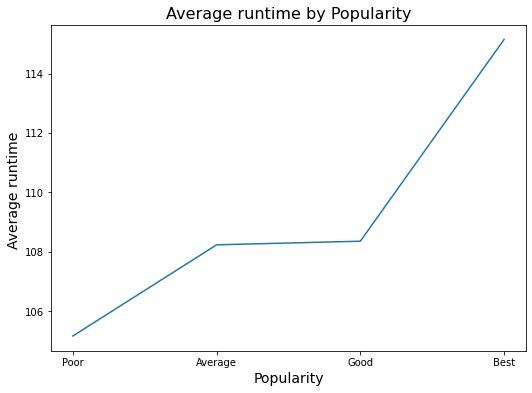

In [46]:
#plotting the average runtime by pop(popularity categories) to gain more insight
plt.plot(popularity_table.index.tolist(), runtime_pop.values.tolist());
plt.title('Average runtime by Popularity', fontsize=16);
plt.xlabel('Popularity', fontsize=14);
plt.ylabel('Average runtime ', fontsize=14);

### Findings
> Averagely longer movies(high runtime) were more popular. Popularity increased with lobger runtime.

### Research Question 3 : How does the popularity and vote_average affect the revenue, budget, profit and runtime a movie?

In [47]:
pop_and_vote_table=df.groupby(['vote', 'pop'])['budget', 'revenue', 'runtime', 'profit'].mean()
pop_and_vote_table

C:\Users\Anointed\Anaconda3\envs\Trial\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


budget       revenue     runtime        profit
vote        pop                                                          
Lowest      Poor     1.885807e+07  2.212054e+07  100.275862  3.262471e+06
            Average  3.083909e+07  4.349966e+07  100.640351  1.266056e+07
            Good     4.843694e+07  9.691267e+07  101.310861  4.847572e+07
            Best     7.648190e+07  1.890069e+08  106.784483  1.125250e+08
Average     Poor     1.832080e+07  2.535250e+07  106.185345  7.031704e+06
            Average  3.010508e+07  6.100662e+07  108.237903  3.090154e+07
            Good     4.183965e+07  1.039574e+08  105.315175  6.211772e+07
            Best     7.182291e+07  2.239338e+08  108.288557  1.521109e+08
Fairly High Poor     1.648110e+07  2.404408e+07  109.013889  7.562976e+06
            Average  2.276060e+07  5.161159e+07  111.397260  2.885100e+07
            Good     3.423164e+07  9.604047e+07  111.892241  6.180883e+07
            Best     7.209874e+07  2.658298e+08  113.711297  1.937310e+08
Highest     Poor     1.194275e+07  3.411265e+07  110.802920  2.216989e+07
            Average  1.696434e+07  4.593884e+07  120.660131  2.897450e+07
            Good     2.226160e+07  7.022020e+07  117.286408  4.795860e+07
            Best     6.026696e+07  3.023180e+08  121.778325  2.420510e+08

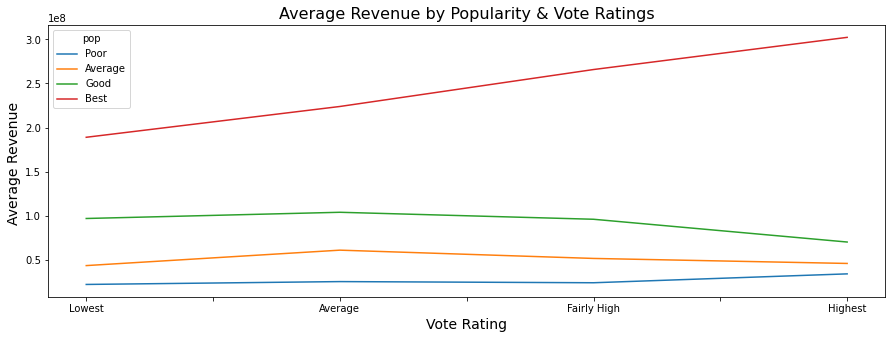

In [49]:
#Ploting the relationship between Popularity & Vote Ratings Vs Average Revenue 
fig, ax = plt.subplots(figsize=(15,5));
pop_and_vote_table['revenue'].unstack().plot(ax=ax);
plt.title('Average Revenue by Popularity & Vote Ratings', fontsize=16);
plt.xlabel('Vote Rating', fontsize=14);
plt.ylabel('Average Revenue ', fontsize=14);

## Findings
> 1. Generally the more popular a movie is, the higher the Revenue generated. The most rated movies by votes also generate higher average revenues.
>
>
> 2. As the popularity and Vote rathings increased the averagely generated revenue also increased.

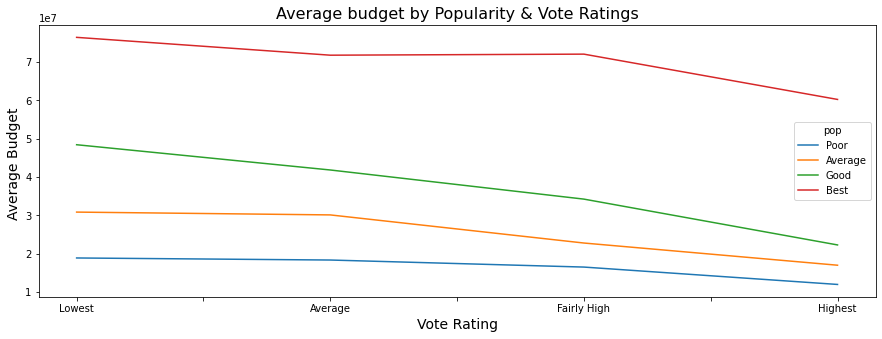

In [50]:
#Ploting the relationship between Popularity & Vote Ratings Vs Average Budget 
fig, ax = plt.subplots(figsize=(15,5));
pop_and_vote_table['budget'].unstack().plot(ax=ax);
plt.title('Average budget by Popularity & Vote Ratings', fontsize=16);
plt.xlabel('Vote Rating', fontsize=14);
plt.ylabel('Average Budget ', fontsize=14);

## Findings
> 1. Generally the most popular movies require averagely large amount of budget to make.
>
>
> 2. Interestingly as the vote rating of the movie increased the average budget reduced.

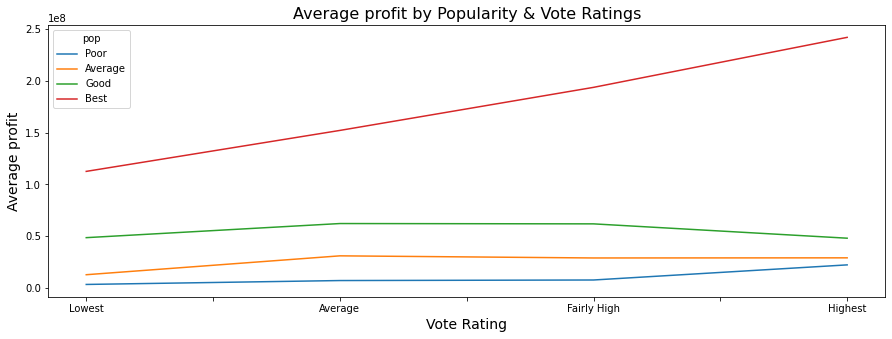

In [51]:
#Ploting the relationship between Popularity & Vote Ratings Vs Average Profit 
fig, ax = plt.subplots(figsize=(15,5));
pop_and_vote_table['profit'].unstack().plot(ax=ax);
plt.title('Average profit by Popularity & Vote Ratings', fontsize=16);
plt.xlabel('Vote Rating', fontsize=14);
plt.ylabel('Average profit', fontsize=14);

## Findings

> 1. The Average Profit increases as the popularity and vote rating of the movie increased. 
>
>
> 2. However the Popularity seem to have a stronger infulence on average profit than the vote rating. 
>
>
> 3. It seemed that the most popular movie with the least popular ratings generated more average profit than the most vate-rated movies with Good, Average and poor Popularity.
>
>
> 4. To earn more proift the goal can be to increase the popularity of the movie than just seeking more vote ratings.

### Research Question 4 : Which Genre was produced the most?

In [55]:
#creating a function to create a dataframe to acess genres in data set
def table(column):
    
    table = df[column].str.cat(sep = '|')
    table = pd.Series(table.split('|'))
    number = table.value_counts(ascending = True)
    return number

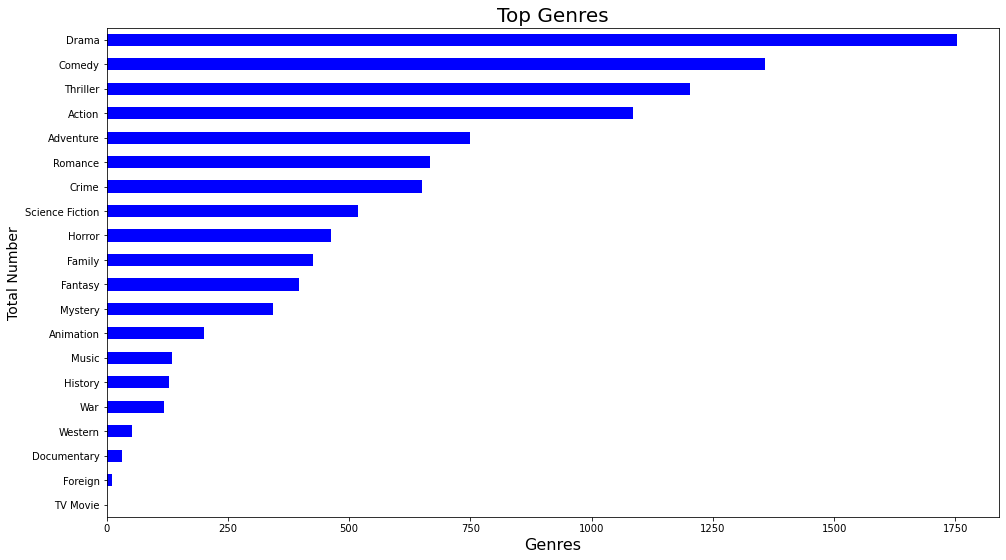

In [57]:
number=table('genres')
dig=number.plot(kind="barh",color="blue");
dig.figure.set_size_inches(16, 9);
dig.set_xlabel('Genres', fontsize = '16');
dig.set_ylabel('Total Number', fontsize = '14');
plt.title("Top Genres",size=20);

## Findings

> Drama genre is the most produced movie in our cleaned dataset, with a value count of 1750.

<a id='conclusions'></a>
## Conclusions

> 1. **Vote Ratings:** The movies with the best ratings generated more average revenue and profit. Also the longer the movie (high average runtime) the more rated the movie was.
>
>
> 2. **Popularity:** The movies with highest popularity generated more average revenue and profit. These movies also require large amounts of average budgets to produce. Also the longer the movie(high average runtime) the more popular the movie was.
>
>
>3. **Popularity and Vote Ratings:** Popularity and Vote Ratings increased the average revenue and profit generated increased. Interestingly as the vote average of a movie increased the required budget reduced. Popularity seem to have a stronger infulence on average profit than vote ratings.
>
>
> 4. **Genre** Drama genre is the most produced movie in our cleaned dataset, with a value count of 1750.


**LIMITATIONS**
A column data for revenue and budget aren't stated clearly in any currency. Moreover we aren't sure datasets provided to us are up-to-date. The dropped rows and column also affect the overall analysis